In [2]:
import pandas as pd
from requests import get, HTTPError, ConnectionError, Timeout, RequestException
import numpy as np
import json
from InquirerPy import inquirer
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
currency = ["chf", "usd", "eur"]
LAST_DAYS = 30
FORMAT = "json"
TABLE = "a"




In [ ]:
def get_data(currency):
    url = f"http://api.nbp.pl/api/exchangerates/rates/{TABLE}/{currency}/last/{LAST_DAYS}/?format={FORMAT}"
    try:
        res = get(url)
        body = res.json()
        return body
    except ConnectionError as error:
        print(f"There was an connection error: {error}")
    except HTTPError as error:
        print(f"Request failed with status code: {error}")
    except Timeout:
        print("Request timeout")
    except RequestException:
        print("Something went wrong")

In [ ]:
# dummy_url = "http://api.nbp.pl/api/exchangerates/rates/a/chf/last/10/?format=json"
# dummy_json = get(dummy_url).json()

In [ ]:
def format_data(json_data):
    rates = json_data["rates"]
    df = pd.DataFrame(rates)

    index = df["effectiveDate"]
    column = f"{json_data['code']}/PLN"
    # column = json_data['code']

    df.drop(columns=["no", "effectiveDate"], inplace=True)

    df.index = index
    df.columns = [column]
    df.index.name = "Date"

    return df


In [ ]:
json_datas = map(get_data, currency)
json_datas = list(json_datas)
dataframes = map(lambda currency: format_data(currency), list(json_datas))
dataframes = list(dataframes)
merged_df = pd.concat(dataframes, axis=1)

In [ ]:
# merged_df["EUR/USD"] = merged_df["EUR/PLN"].divide(merged_df["USD/PLN"])
# merged_df["CHF/USD"] = merged_df["CHF/PLN"].divide(merged_df["USD/PLN"])

In [ ]:
def calculate_exchange_rate(dataframe, numerator, denominator, output_column_name, inplace=False):
    if not inplace:
        dataframe = dataframe.copy()

    dataframe[output_column_name] = dataframe[numerator].divide(dataframe[denominator])
    dataframe[output_column_name] = dataframe[output_column_name].round(4)

    if inplace:
        return None
    return dataframe

In [ ]:
calculate_exchange_rate(merged_df, "EUR/PLN", "USD/PLN", "EUR/USD")
calculate_exchange_rate(merged_df, "CHF/PLN", "USD/PLN", "CHF/USD", inplace=True)


In [ ]:
merged_df.to_csv("all_currency_data.csv", sep=";", decimal=",")

In [ ]:
selected = ["USD/PLN", "CHF/USD"]
new_df = pd.read_csv("all_currency_data.csv", sep=";", decimal=",", index_col="Date")
new_df = new_df[new_df.columns.intersection(selected)]
new_df.to_csv("selected_currency_data.csv", sep=";", decimal=",")

In [ ]:
df = pd.read_csv("all_currency_data.csv", sep=";", decimal=",", index_col="Date")

# df.agg(["mean", "median", "min", "max"]).round(4)
# mean = df["CHF/PLN"].mean()

In [ ]:
# plots = df.plot(subplots=True)
# for plot in plots:
#     plot.axhline(mean, color='r', linestyle='--')
#     plot.text(0.95, mean, f"Mean {mean:.4f}", verticalalignment='bottom', horizontalalignment='right',
#               transform=plot.get_yaxis_transform())


In [ ]:
# ax = df["CHF/PLN"].plot()
# ax.axhline(mean, color='r', linestyle='--')
# ax.text(0.95, mean, f"Mean {mean:.4f}", verticalalignment='bottom', horizontalalignment='right',
#         transform=ax.get_yaxis_transform())
#
# plt.show()

In [113]:
def create_line(ax, color, value, name):
    ax.axhline(mean, color=color, linestyle='--')
    ax.text(0.95, value, f"{name} {value:.4f}", verticalalignment='bottom', horizontalalignment='right',
            transform=ax.get_yaxis_transform())

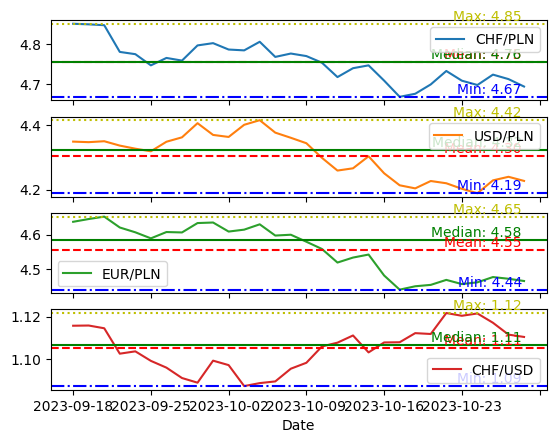

In [119]:
# Generate the subplots and capture the array of AxesSubplot objects
axes = df.plot(subplots=True)

# Define a list of statistics and their corresponding colors
stats = {
    'Mean': {'color': 'r', 'linestyle': '--'},
    'Median': {'color': 'g', 'linestyle': '-'},
    'Min': {'color': 'b', 'linestyle': '-.'},
    'Max': {'color': 'y', 'linestyle': ':'}
}

# date_format = mdates.DateFormatter("%m-%d")
# Iterate through Axes to add lines for various statistics
for ax, col in zip(axes, df.columns):
    for stat, style in stats.items():
        if stat == 'Mean':
            value = df[col].mean()
        elif stat == 'Median':
            value = df[col].median()
        elif stat == 'Min':
            value = df[col].min()
        elif stat == 'Max':
            value = df[col].max()

        ax.axhline(value, color=style['color'], linestyle=style['linestyle'])
        ax.text(0.95, value, f'{stat}: {value:.2f}', verticalalignment='bottom', horizontalalignment='right',
                transform=ax.get_yaxis_transform(), color=style['color'])
        # ax.xaxis.set_major_formatter(date_format)

# Show the plot
plt.show()

In [3]:
pd.read_csv("xd.wq")

FileNotFoundError: [Errno 2] No such file or directory: 'xd.wq'